数据集信息:
数据形状: (150, 2)
标签分布: [50 50 50]
特征名称: ['sepal length (cm)', 'sepal width (cm)']
目标名称: ['setosa' 'versicolor' 'virginica']
trianing prediction:0.819
test data prediction:0.778
traing data准确率: 81.90%
testing data准确率: 77.78%
decision_function:
 [[-0.30211294  1.26751032  2.28292526]
 [ 2.17963206 -0.19629675  1.06956422]
 [ 2.25347702  0.79692655 -0.20587224]
 [ 2.22849377  0.99297611 -0.22777916]
 [ 0.95330441  2.18529743 -0.17375192]
 [ 2.23005712  0.84412899 -0.19144453]
 [ 2.16996356 -0.14443414  0.92795057]
 [-0.28710998  1.12310279  2.28302495]
 [-0.28026178  1.21460371  2.25881762]
 [-0.29333851  1.24540239  2.2732035 ]
 [-0.27046594  1.22826802  2.22682127]
 [-0.26030052  2.22113123  1.20479842]
 [-0.1741059   1.00963572  2.17180911]
 [-0.30032746  1.25900043  2.2829419 ]
 [-0.17768435  2.15664634  1.06772814]
 [ 2.25643276  0.81949943 -0.22763295]
 [-0.24036618  2.23341208  1.06656755]
 [-0.26950019  2.2341744   1.21679709]
 [ 2.22849377  0.99297611 -0.22777916]
 [ 2.25254

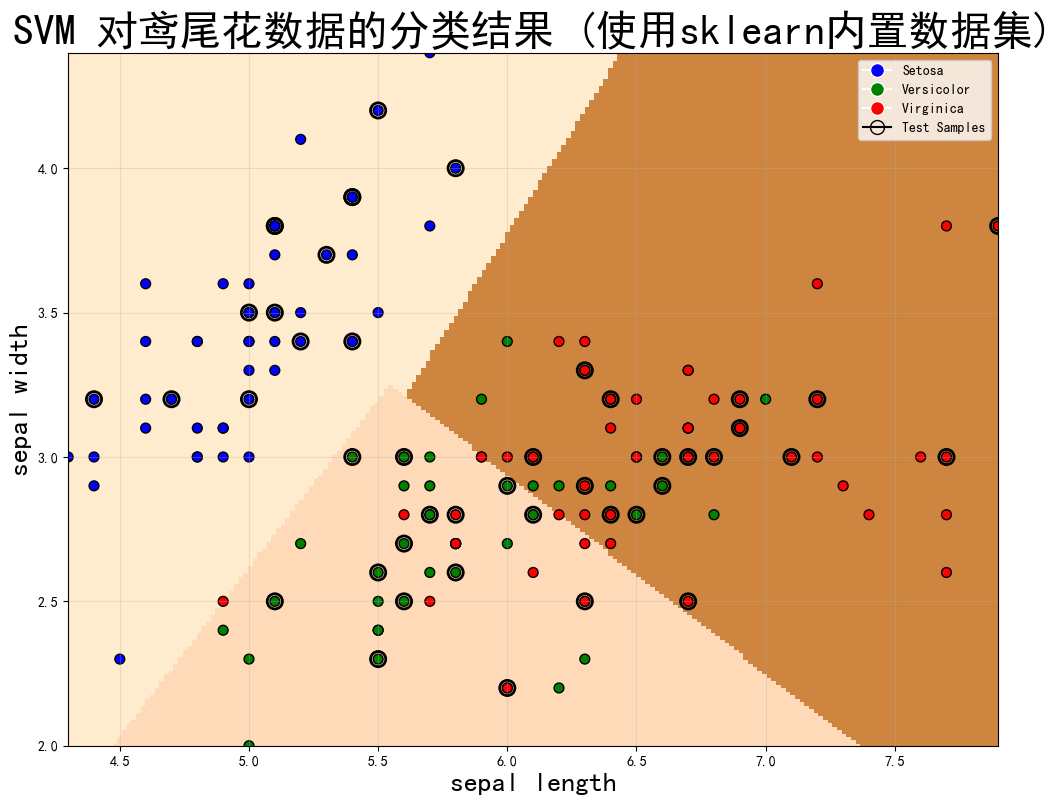

In [2]:
import numpy as np                
from matplotlib import colors     
from sklearn import svm            
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn import datasets  # 导入sklearn数据集模块
import matplotlib.pyplot as plt
import matplotlib as mpl

# 1. 加载sklearn内置的鸢尾花数据集
iris = datasets.load_iris()
x = iris.data[:, :2]  # 只取前两个特征（花萼长度和宽度）以便可视化
y = iris.target

print("数据集信息:")
print(f"数据形状: {x.shape}")
print(f"标签分布: {np.bincount(y)}")
print(f"特征名称: {iris.feature_names[:2]}")
print(f"目标名称: {iris.target_names}")

# 2. 数据分割
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, random_state=1, test_size=0.3)

#3.SVM分类器构建
def classifier():
    clf = svm.SVC(C = 0.5,kernel='linear',decision_function_shape='ovr')
    return clf
# 定义模型：SVM模型定义
clf = classifier()
#4.训练模型
def train(clf,x_train,y_train):
    clf.fit(x_train,y_train.ravel())

# 训练SVM模型
train(clf,x_train,y_train)

# 5. 模型评估函数
def show_accuracy(a,b,tip):
    acc = a.ravel() == b.ravel()
    print(tip + '准确率: %.2f%%' % (np.mean(acc) * 100))
def print_accuracy(clf,x_train,y_train,x_test,y_test):
    #分别打印训练集和测试集的准确率  score(x_train,y_train):表示输出x_train,y_train在模型上的准确率
    print('trianing prediction:%.3f' %(clf.score(x_train, y_train)))
    print('test data prediction:%.3f' %(clf.score(x_test, y_test)))
    #原始结果与预测结果进行对比   predict()表示对x_train样本进行预测，返回样本类别
    show_accuracy(clf.predict(x_train), y_train, 'traing data')
    show_accuracy(clf.predict(x_test), y_test, 'testing data')
    #计算决策函数的值，表示x到各分割平面的距离
    print('decision_function:\n', clf.decision_function(x_train))
print_accuracy(clf,x_train,y_train,x_test,y_test)

# 6. 可视化函数
def draw(clf, x, y, x_test, y_test):
    iris_feature = ['sepal length', 'sepal width', 'petal length', 'petal width']
    # 开始画图
    mpl.rcParams['font.sans-serif'] = [u'SimHei']
    mpl.rcParams['axes.unicode_minus'] = False
    x1_min, x1_max = x[:, 0].min(), x[:, 0].max()               #第0列的范围
    x2_min, x2_max = x[:, 1].min(), x[:, 1].max()               #第1列的范围
    x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]   #生成网格采样点
    grid_test = np.stack((x1.flat, x2.flat), axis=1)            #stack():沿着新的轴加入一系列数组
    
    # 输出样本到决策面的距离
    z = clf.decision_function(grid_test)
    
    grid_hat = clf.predict(grid_test)                           # 预测分类值 得到【0,0.。。。2,2,2】
    grid_hat = grid_hat.reshape(x1.shape)                       # reshape grid_hat和x1形状一致
                                                                
    cm_light = mpl.colors.ListedColormap(['#FFEBCD', '#FFDAB9', '#CD853F'])
    cm_dark = mpl.colors.ListedColormap(['b', 'g', 'r'])  # 修改颜色使其更明显

    plt.figure(figsize=(12, 9))
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)                           # 参数代入                                                                      
    
    # 绘制训练样本点
    plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y), edgecolor='k', s=50, cmap=cm_dark) 
    # 绘制测试样本点（用圆圈标记）
    plt.scatter(x_test[:, 0], x_test[:, 1], s=120, facecolor='none', edgecolor='black', linewidth=2, zorder=10)       
    
    plt.xlabel(iris_feature[0], fontsize=20)
    plt.ylabel(iris_feature[1], fontsize=20)
    
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title('SVM 对鸢尾花数据的分类结果 (使用sklearn内置数据集)', fontsize=30)
    plt.grid(alpha=0.3)
     # 添加图例
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label='Setosa'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='g', markersize=10, label='Versicolor'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='Virginica'),
        Line2D([0], [0], marker='o', color='black', markerfacecolor='none', markersize=10, label='Test Samples')
    ]
    plt.legend(handles=legend_elements, loc='upper right')
    plt.show()
# 7. 模型使用和可视化
draw(clf, x, y, x_test, y_test)


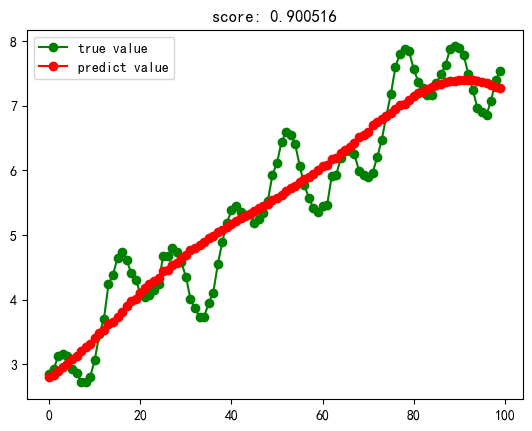

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 数据生成函数
def f(x1, x2): 
    y = 0.5 * np.sin(x1) + 0.5 * np.cos(x2) + 3 + 0.1 * x1
    return y

# 加载数据
def load_data(): 
    x1_train = np.linspace(0, 50, 500) 
    x2_train = np.linspace(-10, 10, 500) 
    y_train = f(x1_train, x2_train) + (np.random.random(500) - 0.5)
    data_train = np.column_stack((x1_train, x2_train, y_train))

    x1_test = np.linspace(0, 50, 100) + 0.5 * np.random.random(100) 
    x2_test = np.linspace(-10, 10, 100) + 0.02 * np.random.random(100) 
    y_test = f(x1_test, x2_test)
    data_test = np.column_stack((x1_test, x2_test, y_test))
    
    return data_train, data_test 

train, test = load_data() 
x_train, y_train = train[:, :2], train[:, 2]  
x_test, y_test = test[:, :2], test[:, 2]  

# 回归方法调用封装
def try_different_method(model): 
    model.fit(x_train, y_train) 
    score = model.score(x_test, y_test) 
    result = model.predict(x_test) 
    plt.figure() 
    plt.plot(np.arange(len(result)), y_test, 'go-', label='true value') 
    plt.plot(np.arange(len(result)), result, 'ro-', label='predict value') 
    plt.title('score: %f' % score) 
    plt.legend() 
    plt.show()

# SVM回归模型
from sklearn import svm 
model_SVR = svm.SVR() 
try_different_method(model_SVR)